# Hackathon : Reinforcement Learning for Drone Navigation

- Team name:
- Team members names:

## 0. Prerequisites

In [1]:
%pip install -r requirements.txt

  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 178.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 96.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 184.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.6/766.6 MB 35.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 50.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 31.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 78.5 MB/s eta 0:00:0000:0100:01
   ━━━━━

In [2]:
%load_ext autoreload
%autoreload 2

import env
import agentqmix
import reward
import simulate
import os
import json

Matplotlib is building the font cache; this may take a moment.


## 1. Training

In [ ]:
# try :
#     os.remove("reward_log.txt")
# except : 
#     pass
trained_agent, all_rewards = simulate.train('config.json')

Using device: cuda
Networks initialized - Q-Net and Mixer created
Episode 1, Step 79, Reward: -2214.66, Evacuated: 0, Deactivated: 3
Goal area :  [(0, 29), (1, 29), (0, 28), (1, 28)]
Static Goal is in top-right, rotate 90° clockwise

Episode 1, Step 80, Reward: -2254.65, Evacuated: 0, Deactivated: 4
Episode 2, Step 30, Reward: -821.93, Evacuated: 0, Deactivated: 3
Goal area :  [(0, 0), (1, 0), (0, 1), (1, 1)]
Static Goal is in top-left, rotate 180°

Episode 2, Step 31, Reward: -861.93, Evacuated: 0, Deactivated: 4
Episode 3, Step 65, Reward: -958.89, Evacuated: 0, Deactivated: 3
Goal area :  [(29, 29), (28, 29), (29, 28), (28, 28)]
Static bottom-righ

Episode 3, Step 66, Reward: -998.89, Evacuated: 0, Deactivated: 4
Episode 4, Step 104, Reward: -2210.21, Evacuated: 0, Deactivated: 3
Goal area :  [(0, 0), (1, 0), (0, 1), (1, 1)]
Static Goal is in top-left, rotate 180°

Episode 4, Step 105, Reward: -2250.21, Evacuated: 0, Deactivated: 4
Episode 5, Step 69, Reward: -1486.64, Evacuated: 0,

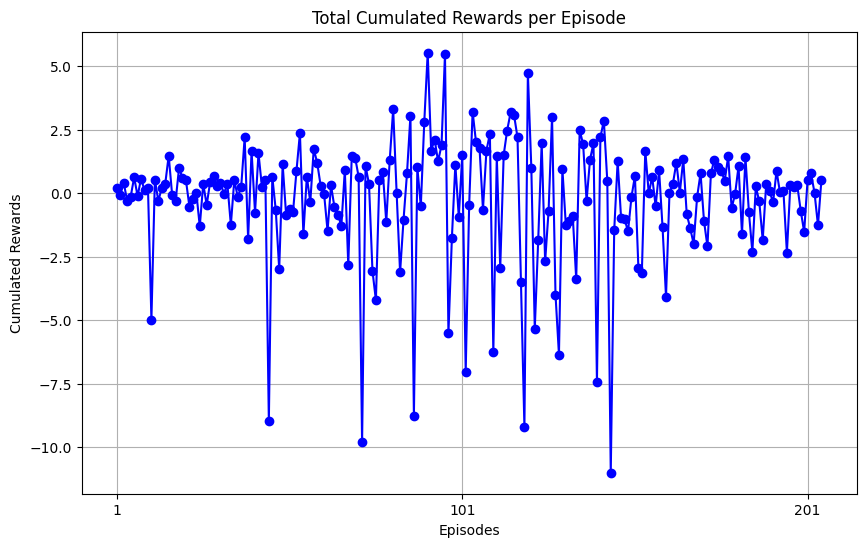

In [8]:
# Plot the cumulated rewards per episode
simulate.plot_cumulated_rewards(all_rewards)

## 2. Evaluation

In [ ]:
eval_config_paths = [f"./eval_configs/config_{i}.json" for i in range(1, 11)]

In [ ]:
all_results = simulate.evaluate(eval_config_paths, trained_agent)

In [ ]:
display(all_results)

In [ ]:
# Calculate averages for each configuration
averages = all_results.groupby('config_path').mean().reset_index().drop(columns=['episode'])
averages = averages.rename(columns={
    'steps': 'avg_steps',
    'reward': 'avg_reward',
    'evacuated': 'avg_evacuated',
    'deactivated': 'avg_deactivated'})

display(averages)
averages.to_csv('averages.csv', index=False)